# **Importacion de Recursos**

In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import pprint as pprint

In [30]:
# Montar Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
# Ruta correcta al archivo Excel en tu Google Drive
path_dataset = '/content/gdrive/MyDrive/expectativa-vida.xlsx'

# Leer el archivo Excel usando pd.read_excel()
data = pd.read_excel(path_dataset)

# **Trasformaciones Esenciales**

In [32]:
# Crear un diccionario para mapear los nombres de las columnas
nombres_columnas = {
    'Country': 'País',
    'Year': 'Año',
    'Status': 'Estado',
    'Life expectancy ': 'Esperanza de vida',
    'Adult Mortality': 'Mortalidad adulta',
    'infant deaths': 'Muertes infantiles',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Gasto en porcentaje',
    'Hepatitis B': 'Hepatitis B',
    'Measles ': 'Sarampión',
    ' BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    'Polio': 'Polio',
    'Total expenditure': 'Gasto total',
    'Diphtheria ': 'Difteria',
    ' HIV/AIDS': 'VIH/SIDA',
    'GDP': 'PIB',
    'Population': 'Población',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Composición de ingresos de recursos',
    'Schooling': 'Escolarización'
}

# Cambiar los nombres de las columnas usando el método rename()
data = data.rename(columns=nombres_columnas)

In [33]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(data.isnull().sum())


Valores nulos en el dataset:
País                                     0
Año                                      0
Estado                                   0
Esperanza de vida                       10
Mortalidad adulta                       10
Muertes infantiles                       0
Alcohol                                194
Gasto en porcentaje                      0
Hepatitis B                            553
Sarampión                                0
IMC                                     34
Muertes menores de cinco años            0
Polio                                   19
Gasto total                            226
Difteria                                19
VIH/SIDA                                 0
PIB                                    448
Población                              652
Delgadez 1-19 años                      34
Delgadez 5-9 años                       34
Composición de ingresos de recursos    167
Escolarización                         163
dtype: int64


In [34]:
# Verificar la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 2938 non-null   object 
 1   Año                                  2938 non-null   int64  
 2   Estado                               2938 non-null   object 
 3   Esperanza de vida                    2928 non-null   float64
 4   Mortalidad adulta                    2928 non-null   float64
 5   Muertes infantiles                   2938 non-null   int64  
 6   Alcohol                              2744 non-null   float64
 7   Gasto en porcentaje                  2938 non-null   float64
 8   Hepatitis B                          2385 non-null   float64
 9   Sarampión                            2938 non-null   int64  
 10  IMC                                  2904 non-null   float64
 11  Muertes menores de cinco años 

In [35]:
# Obtenemos informacion sobre filas y columnas. resultSet(filas, columnas)
data.shape

(2938, 22)

In [36]:
# Eliminar filas con valores NaN e infinitos
data_clean = data.dropna()  # Elimina filas con valores NaN
data_clean = data_clean.replace([np.inf, -np.inf], np.nan).dropna()  # Elimina filas con valores infinitos

# **Análisis Descriptivo - Variables Estadisticas**

In [37]:
# Verificar la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 2938 non-null   object 
 1   Año                                  2938 non-null   int64  
 2   Estado                               2938 non-null   object 
 3   Esperanza de vida                    2928 non-null   float64
 4   Mortalidad adulta                    2928 non-null   float64
 5   Muertes infantiles                   2938 non-null   int64  
 6   Alcohol                              2744 non-null   float64
 7   Gasto en porcentaje                  2938 non-null   float64
 8   Hepatitis B                          2385 non-null   float64
 9   Sarampión                            2938 non-null   int64  
 10  IMC                                  2904 non-null   float64
 11  Muertes menores de cinco años 

**Variables Cualitativas Nominales:**

País (object)

Estado (object)

**Variables Cuantitativas Discretas:**

Año (int64)

Muertes infantiles (int64)

Sarampión (int64)

Muertes menores de cinco años (int64)

**Variables Cuantitativas Continuas:**

Esperanza de vida (float64)

Mortalidad adulta (float64)

Alcohol (float64)

Gasto en porcentaje (float64)

Hepatitis B (float64)

IMC (float64)

Polio (float64)

Gasto total (float64)

Difteria (float64)

VIH/SIDA (float64)

PIB (float64)

Población (float64)

Delgadez 1-19 años (float64)

Delgadez 5-9 años (float64)

Composición de ingresos de recursos (float64)

Escolarización (float64)

In [38]:
data.describe()

,Año,Esperanza de vida,Mortalidad adulta,Muertes infantiles,Alcohol,Gasto en porcentaje,Hepatitis B,Sarampión,IMC,Muertes menores de cinco años,Polio,Gasto total,Difteria,VIH/SIDA,PIB,Población,Delgadez 1-19 años,Delgadez 5-9 años,Composición de ingresos de recursos,Escolarización
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2.938000e+03,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2.490000e+03,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,2.854762e+09,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,1.671906e+09,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,2.754542e+09,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,2.334319e+09,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.145600e+02,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,1.597777e+08,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,1.179419e+08,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,2.047150e+09,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,4.707527e+08,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,4.696168e+09,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,2.494125e+09,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,9.983498e+09,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,9.988227e+09,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# **Análisis Descriptivo - Visualización**

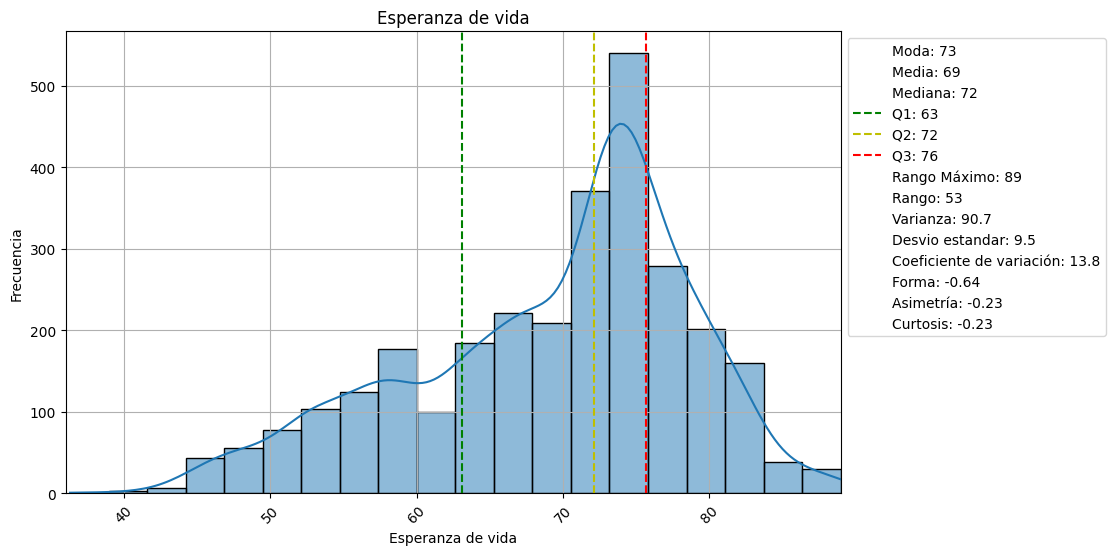

La distribución es Unimodal.
La distribución es Asimétrica Negativa.
La distribución es Platicúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.39% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.29% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.24% de los datos.
El rango está comprendido entre 36 y 89.


In [39]:
# Nombre de la columna
columna = 'Esperanza de vida'

#  Medidadas de centralización
moda = data[columna].mode().iloc[0]
media = data[columna].mean()
mediana = data[columna].median()

# Cuartiles
Q1 = data[columna].quantile(0.25)
Q2 = data[columna].quantile(0.50)
Q3 = data[columna].quantile(0.75)

# Determinar el número de modas
frecuencias = data[columna].value_counts()
numero_de_modas = len(frecuencias[frecuencias == frecuencias.max()])

# Medidas de Dispersión
rango_max = data[columna].max()
rango_min = data[columna].min()
rango = data[columna].max() - data[columna].min()
varianza = data[columna].var()
desvio_estandar = data[columna].std()
coef_variacion = (desvio_estandar / data[columna].mean()) * 100

# Forma
forma = data[columna].skew()
asimetria = data[columna].kurtosis()
curtosis = data[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((data[columna] >= Q1) & (data[columna] <= Q2)).sum() / len(data[columna]) * 100
concentracion_Q2_Q3 = ((data[columna] >= Q2) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100
concentracion_Q1_Q3 = ((data[columna] >= Q1) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))

sns.histplot(data[columna], bins=20, kde=True)

#Lenyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.0f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.0f}', visible=False)
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.0f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.0f}')
plt.axvline(Q2, color='y', linestyle='--', label=f'Q2: {Q2:.0f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.0f}')

plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.xlim(36, 89)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
if numero_de_modas == 1:
    print("La distribución es Unimodal.")
elif numero_de_modas == 2:
    print("La distribución es Bimodal.")
elif numero_de_modas > 2:
    print("La distribución es Multimodal.")
else:
    print("La distribución es Sin Moda.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")


**Podemos observar que la mayor densidad del histograma se encuentra en el intervalo Q1(25%) y Q3(75%).**

**Dentro de la distancia intercuartil Q3-Q1 puede decirse que la mayor concentración de datos está entre Q2 y Q3, que contiene la moda.**

**El 50% de los datos se encuentra entre 63 y 76 años (Q1 y Q3, respectivamente) mientras que el rango está comprendido entre 0 a 89 años.**

**La distribución es Unimodal.**

**La distribución es asimétrica negativa porque la moda>mediana>media.**

**La distribución es Platicúrtica.**


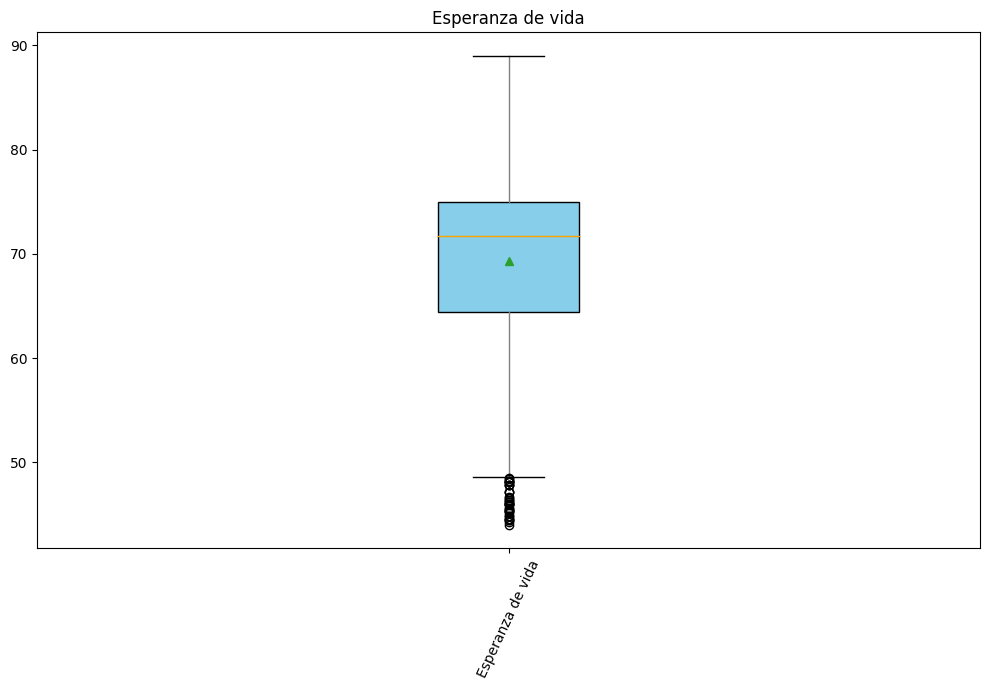

Podemos observar que para Esperanza de vida, tenemos la siguiente distribución:
Mediana: 72
Mediana: 69
Q1: 64
Q3: 75
Rango intercuartílico (IQR): 11


In [40]:
# Columna y datos
columnas_numericas_continuas = ['Esperanza de vida']
vals_continuas = [data_clean[col].values for col in columnas_numericas_continuas]
nombres_continuas = columnas_numericas_continuas

# Grafico
plt.figure(figsize=(10, 7))

# Estilo de las cajas y los puntos para variables continuas
plt.boxplot(vals_continuas, labels=nombres_continuas, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue'), meanprops=dict(color='green'), medianprops=dict(color='orange'), whiskerprops=dict(color='gray'))
plt.title('Esperanza de vida')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# Calcula la mediana, cuartiles y valores extremos
mediana = np.median(vals_continuas, axis=1)
media = np.mean(vals_continuas, axis=1)
Q1 = np.percentile(vals_continuas, 25, axis=1)
Q3 = np.percentile(vals_continuas, 75, axis=1)
IQR = Q3 - Q1

# Imprime la información numérica
for i, col in enumerate(nombres_continuas):
    print(f"Podemos observar que para {col}, tenemos la siguiente distribución:")
    print(f"Mediana: {mediana[i]:.0f}")
    print(f"Mediana: {media[i]:.0f}")
    print(f"Q1: {Q1[i]:.0f}")
    print(f"Q3: {Q3[i]:.0f}")
    print(f"Rango intercuartílico (IQR): {IQR[i]:.0f}")

**Podemos observar quee la caja contiene el 50% de los datos.Dentro de esta, entre Q1 y la mediana (Q2) se encuentran el 25% de los datos y entre la mediana (Q2) y Q3 el restante 25% de los datos.**

**Se observa una caja compacta y asimétrica, donde la mayor densidad de datos se encuentra entre los percentiles Q2 y Q3 que están relativamente cerca (donde, Q2(72) y Q3(76)) que contiene la moda coincidente con el intervalo de clase [73,76] del histograma “Esperanza de Vida”.**

**Entre los percentiles Q1 y Q2 la distancia es más grande que entre Q2-Q3. A través del análisis del boxplot se confirma que la distribución es asimétrica negativa, como fue se justificado en el análisis del histograma (moda>mediana>media), porque los datos se concentran entre Q2-Q3 y el bigote Ls es de menor tamaño que Li. Los outliers se concentran por debajo del extremo inferior del bigote Li.**

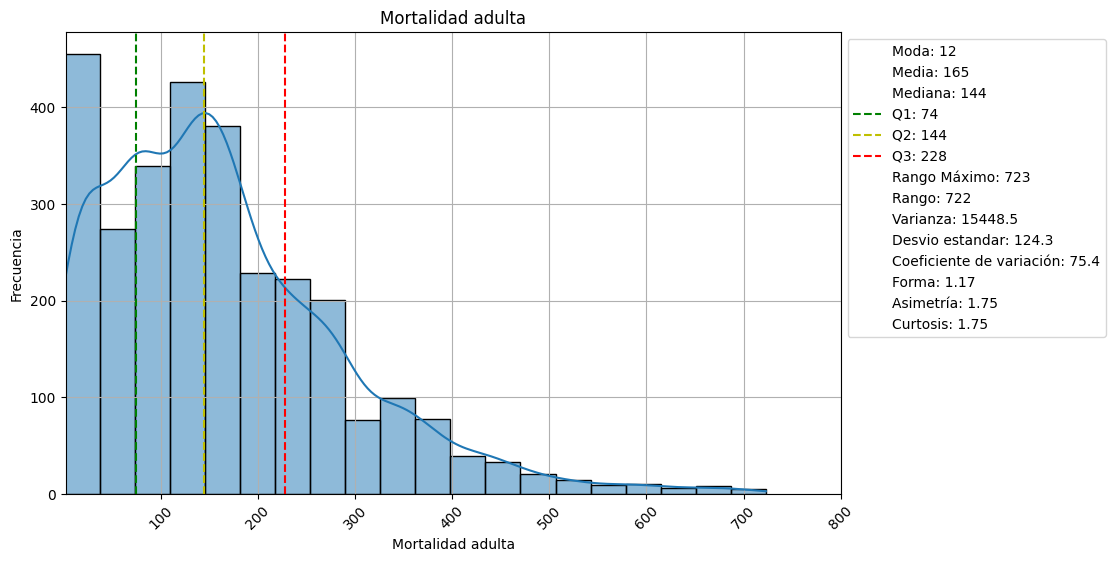

La distribución es Bimodal.
La distribución es Asimétrica Positiva.
La distribución es Platicúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.56% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.39% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.20% de los datos.
El rango está comprendido entre 1 y 723.


In [41]:
# Nombre de la columna
columna = 'Mortalidad adulta'

#  Medidadas de centralización
moda = data[columna].mode().iloc[0]
media = data[columna].mean()
mediana = data[columna].median()

# Cuartiles
Q1 = data[columna].quantile(0.25)
Q2 = data[columna].quantile(0.50)
Q3 = data[columna].quantile(0.75)

# Medidas de Dispersión
rango_max = data[columna].max()
rango_min = data[columna].min()
rango = data[columna].max() - data[columna].min()
varianza = data[columna].var()
desvio_estandar = data[columna].std()
coef_variacion = (desvio_estandar / data[columna].mean()) * 100

# Forma
forma = data[columna].skew()
asimetria = data[columna].kurtosis()
curtosis = data[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((data[columna] >= Q1) & (data[columna] <= Q2)).sum() / len(data[columna]) * 100
concentracion_Q2_Q3 = ((data[columna] >= Q2) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100
concentracion_Q1_Q3 = ((data[columna] >= Q1) & (data[columna] <= Q3)).sum() / len(data[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))

sns.histplot(data[columna], bins=20, kde=True)

#Lenyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.0f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.0f}', visible=False)
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.0f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.0f}')
plt.axvline(Q2, color='y', linestyle='--', label=f'Q2: {Q2:.0f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.0f}')

plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(columna)
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.xlim(2, 800)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
print("La distribución es Bimodal.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")

**Podemos observar que la distribución está concentrada o tiene mayor densidad de datos, entre el mínimo (valor 0) y Q3. Entre el mínimo=0 y Q3=228 están comprendidas las dos modas, dentro de una distribución con un rango entre 0 y 725.**

**La distribución es bimodal. La primer moda tiene el intervalo de clase [0, 37] y la segunda moda [107, 144]. La primer moda se encuentra entre el mínimo y el Q1 y la segunda moda se encuentra entre Q1 y Q2.**

**La distribución es asimétrica positiva porque la moda<mediana<media.**

**De acuerdo al coeficiente calculado es platicúrtica.**


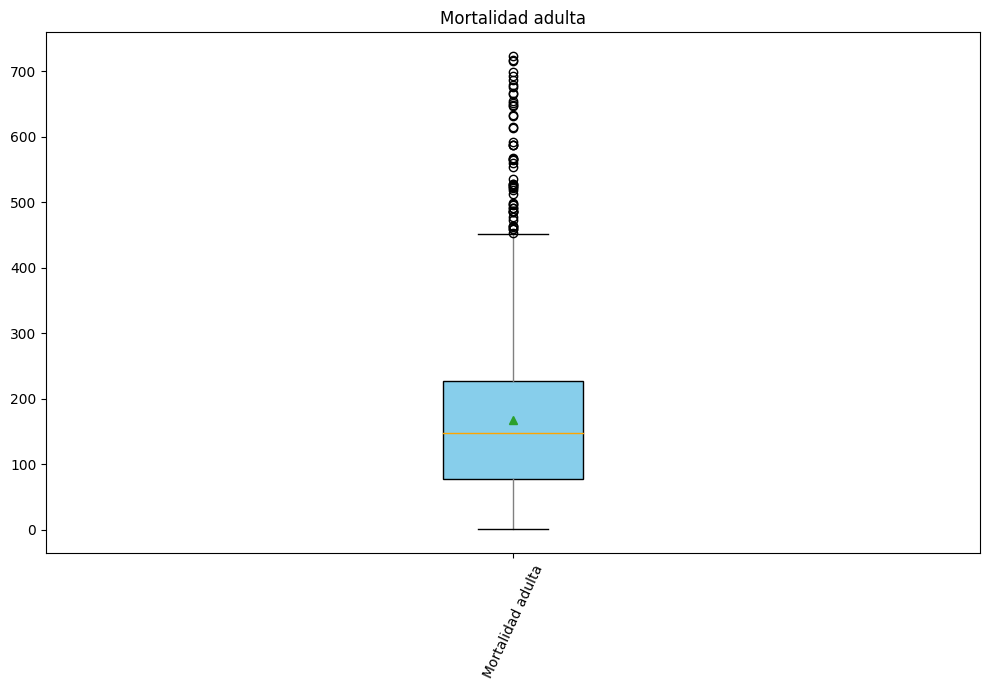

Podemos observar que para Mortalidad adulta, tenemos la siguiente distribución:
Mediana: 148
Mediana: 168
Q1: 77
Q3: 227
Rango intercuartílico (IQR): 150


In [42]:
# Columna y datos
columnas_numericas_continuas = ['Mortalidad adulta']
vals_continuas = [data_clean[col].values for col in columnas_numericas_continuas]
nombres_continuas = columnas_numericas_continuas

# Grafico
plt.figure(figsize=(10, 7))

# Estilo de las cajas y los puntos para variables continuas
plt.boxplot(vals_continuas, labels=nombres_continuas, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue'), meanprops=dict(color='green'), medianprops=dict(color='orange'), whiskerprops=dict(color='gray'))
plt.title('Mortalidad adulta')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# Calcula la mediana, cuartiles y valores extremos
mediana = np.median(vals_continuas, axis=1)
media = np.mean(vals_continuas, axis=1)
Q1 = np.percentile(vals_continuas, 25, axis=1)
Q3 = np.percentile(vals_continuas, 75, axis=1)
IQR = Q3 - Q1

# Imprime la información numérica
for i, col in enumerate(nombres_continuas):
    print(f"Podemos observar que para {col}, tenemos la siguiente distribución:")
    print(f"Mediana: {mediana[i]:.0f}")
    print(f"Mediana: {media[i]:.0f}")
    print(f"Q1: {Q1[i]:.0f}")
    print(f"Q3: {Q3[i]:.0f}")
    print(f"Rango intercuartílico (IQR): {IQR[i]:.0f}")

**Podemos observar que  la caja contiene el 50% de los datos. Dentro de esta, entre Q1 y la mediana (Q2) se encuentran el 25% de los datos y entre la mediana (Q2) y Q3 el restante 25% de los datos.**

**Se observa una caja compacta y levemente asimétrica, donde la mayor densidad de datos se encuentra entre los percentiles Q1 y Q2 que están relativamente cerca (donde, Q1(74) y Q2(144)) que contiene la moda coincidente con el intervalo de clase [109, 144].**

**Entre los percentiles Q2 y Q3 la distancia es levemente mas grande que entre Q1-Q2. A través del análisis del boxplot se confirma que la distribución es asimétrica positiva, como fue se justificado en el análisis del histograma (moda<mediana<media), porque los datos se concentran entre Q1-Q2 y el bigote Li es de menor tamaño que Ls. Los outliers se concentran por arriba del extremo superior del bigote Ls.**

<ipython-input-43-67126f503f73>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Desarrollado', 'Desarrollando'])


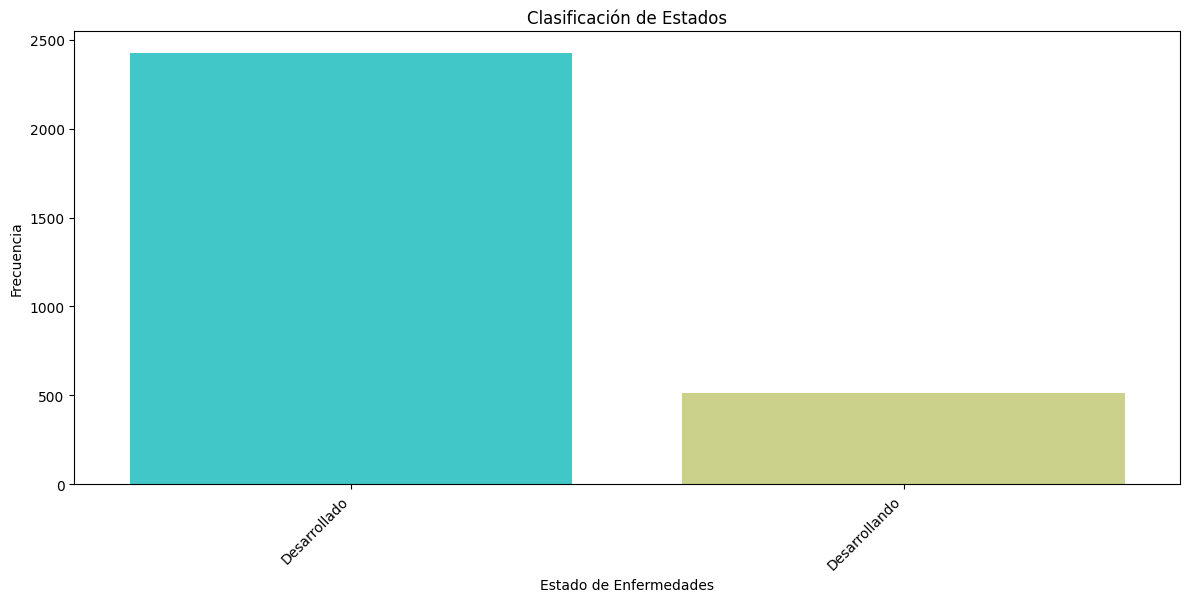

In [43]:
# Grafico
plt.figure(figsize=(12, 6))
sns.countplot(x='Estado', hue='Estado', data=data, order=data['Estado'].value_counts().index, palette='rainbow', legend=False)
plt.title('Clasificación de Estados')
plt.xlabel('Estado de Enfermedades')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Traducción
plt.gca().set_xticklabels(['Desarrollado', 'Desarrollando'])

plt.show()


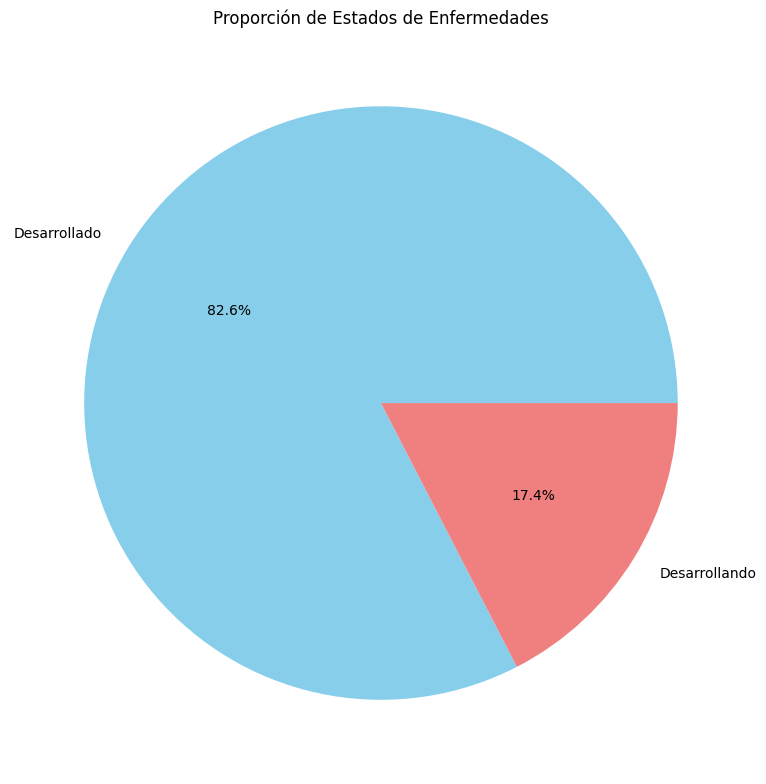

In [44]:
# Grafico
plt.figure(figsize=(8, 8))
# Calculando la frecuencia de cada estado de enfermedad
frecuencia_estados = data['Estado'].value_counts()
# Creando un gráfico de torta con los datos de frecuencia
grafico = plt.pie(frecuencia_estados, labels=['Desarrollado', 'Desarrollando'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Proporción de Estados de Enfermedades')

plt.tight_layout()
plt.show()

<ipython-input-45-ce5dd11c4a25>:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x='Continente', y='Esperanza de vida', data=esperanza_de_vida_por_continente, palette=paleta)
<ipython-input-45-ce5dd11c4a25>:217: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, horizontalalignment='right')


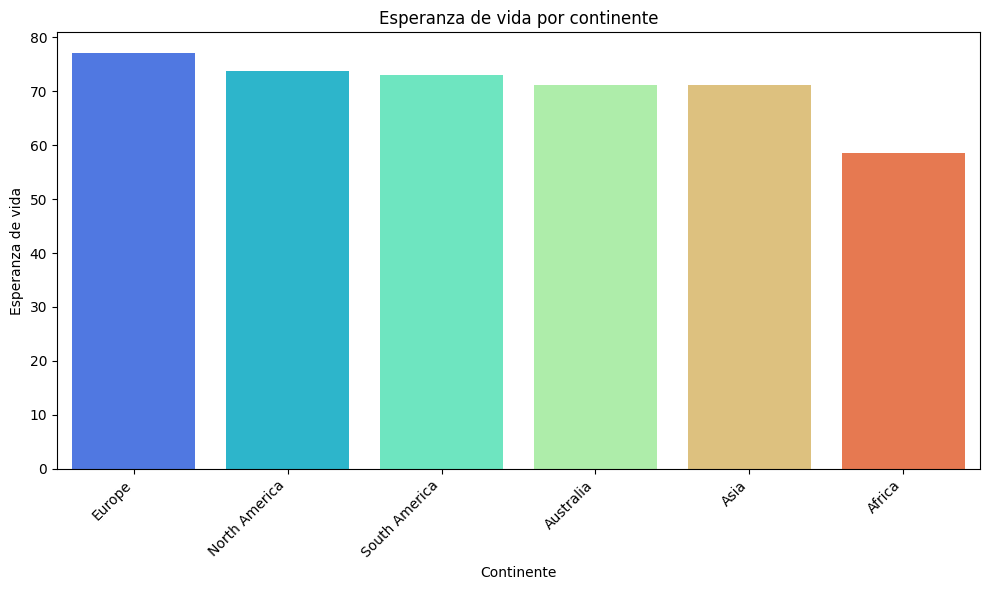

In [45]:
# Crear un diccionario de mapeo de país a continente
mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Europe',
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Azerbaijan': 'Europe',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    "CÃ´te d'Ivoire": 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Australia',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    "Democratic People's Republic of Korea": 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Australia',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Australia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Australia',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Australia',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Australia',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Australia',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Australia',
    'Panama': 'North America',
    'Papua New Guinea': 'Australia',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Australia',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Australia',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'The former Yugoslav republic of Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Agregar una columna de continente al DataFrame utilizando el diccionario de mapeo
data['Continente'] = data['País'].map(mapping)

# Agrupar por continente y calcular el promedio de esperanza de vida
esperanza_de_vida_por_continente = data.groupby('Continente')['Esperanza de vida'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10, 6))

# Ordenar los continentes por esperanza de vida
esperanza_de_vida_por_continente = esperanza_de_vida_por_continente.sort_values(by='Esperanza de vida', ascending=False)

# Paleta de colores
paleta = sns.color_palette("rainbow", len(esperanza_de_vida_por_continente))

# Graficar
grafico = sns.barplot(x='Continente', y='Esperanza de vida', data=esperanza_de_vida_por_continente, palette=paleta)

# Rotar etiquetas del eje x
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Continente')
plt.ylabel('Esperanza de vida')
plt.title('Esperanza de vida por continente')

plt.tight_layout()
plt.show()



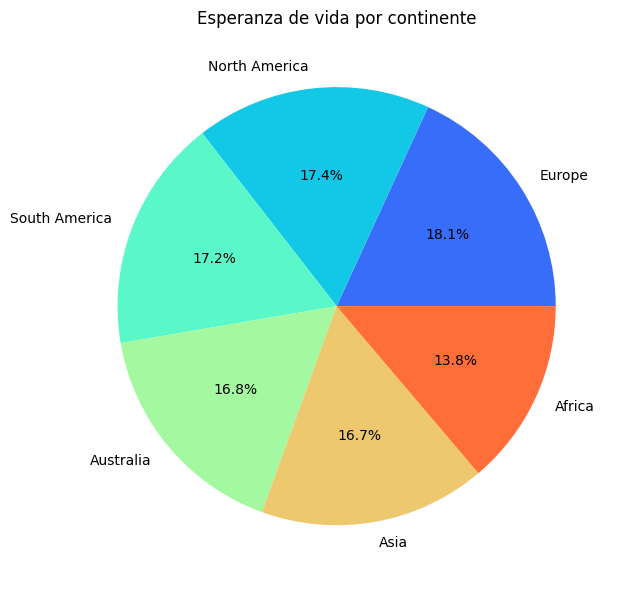

In [46]:
# Agregar una columna de continente al DataFrame utilizando el diccionario de mapeo
data['Continente'] = data['País'].map(mapping)

# Agrupar por continente y calcular el promedio de esperanza de vida
esperanza_de_vida_por_continente = data.groupby('Continente')['Esperanza de vida'].mean().reset_index()

# Ordenar los continentes por esperanza de vida
esperanza_de_vida_por_continente = esperanza_de_vida_por_continente.sort_values(by='Esperanza de vida', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))

# Paleta de colores
paleta = sns.color_palette("rainbow", len(esperanza_de_vida_por_continente))

# Graficar
grafico = plt.pie(esperanza_de_vida_por_continente['Esperanza de vida'], labels=esperanza_de_vida_por_continente['Continente'], autopct='%1.1f%%', colors=paleta)

plt.title('Esperanza de vida por continente')

plt.tight_layout()
plt.show()


# **Análisis Descriptivo - Correlaciones**



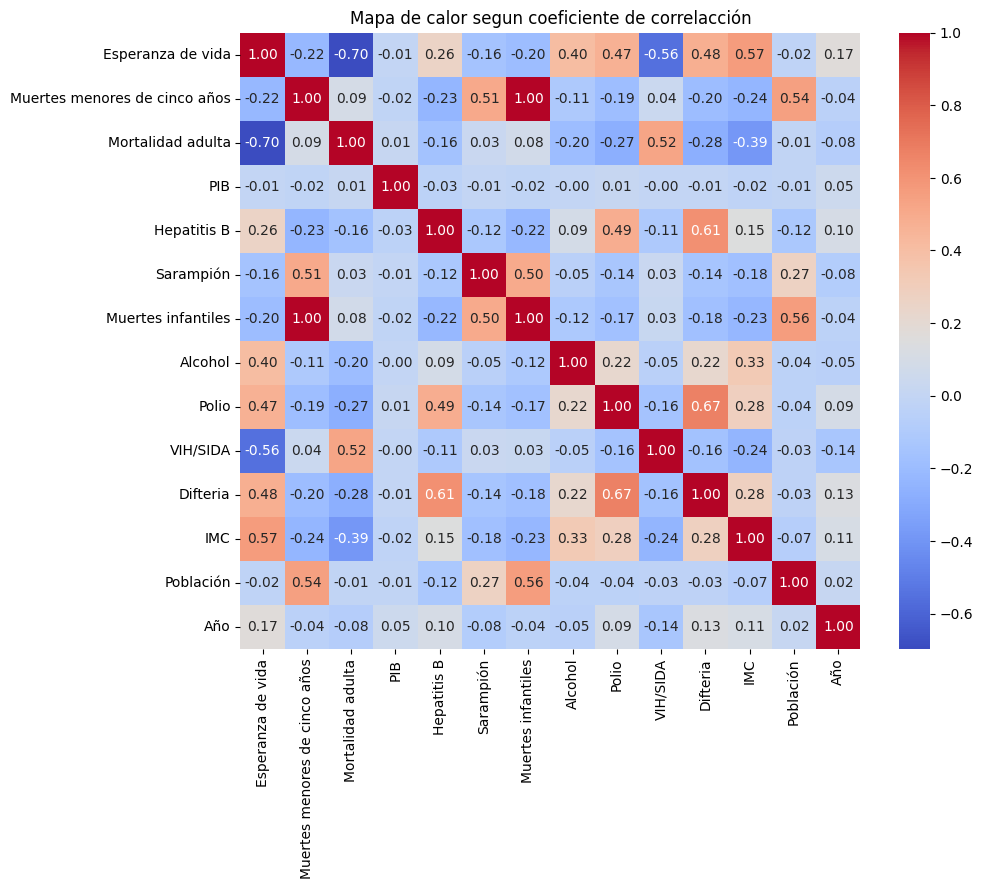

In [47]:
# Filtrar el DataFrame para incluir solo las variables de interés
selected_variables = ['Esperanza de vida', 'Muertes menores de cinco años', 'Mortalidad adulta',  'PIB', 'Hepatitis B', 'Sarampión', 'Muertes infantiles', 'Alcohol', 'Polio', 'VIH/SIDA', 'Difteria', 'IMC', 'Población', 'Año']
filtered_data = data[selected_variables]

# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor segun coeficiente de correlacción')
plt.show()


In [48]:
# Seleccionar las variables de interés
selected_variables = ['Esperanza de vida', 'Muertes menores de cinco años', 'Mortalidad adulta',
                      'PIB', 'Hepatitis B', 'Sarampión', 'Muertes infantiles', 'Alcohol',
                      'Polio', 'VIH/SIDA', 'Difteria', 'IMC', 'Población', 'Gasto total',
                      'Gasto en porcentaje', 'Año']

# Seleccionar las correlaciones a estudiar
correlation_pairs = [('Esperanza de vida', 'IMC'),
                     ('Esperanza de vida', 'Alcohol'),
                     ('Esperanza de vida', 'Polio'),
                     ('Esperanza de vida', 'Difteria'),
                     ('Muertes menores de cinco años', 'Población'),
                     ('Sarampión', 'Muertes menores de cinco años'),
                     ('Sarampión', 'Muertes infantiles'),
                     ('Mortalidad adulta', 'VIH/SIDA'),
                     ('Hepatitis B', 'Polio'),
                     ('Hepatitis B', 'Difteria'),
                     ('IMC', 'Alcohol'),
                     ('IMC', 'Polio'),
                     ('Hepatitis B', 'Esperanza de vida')]

# Calcular y mostrar las correlaciones
for pair in correlation_pairs:
    corr = data[pair[0]].corr(data[pair[1]])
    print(f"Correlación entre {pair[0]} y {pair[1]}: {corr}")



Correlación entre Esperanza de vida y IMC: 0.5676935475459864
Correlación entre Esperanza de vida y Alcohol: 0.4048767611266022
Correlación entre Esperanza de vida y Polio: 0.46555580597719837
Correlación entre Esperanza de vida y Difteria: 0.4794948643415855
Correlación entre Muertes menores de cinco años y Población: 0.5444226494309669
Correlación entre Sarampión y Muertes menores de cinco años: 0.5078087068586818
Correlación entre Sarampión y Muertes infantiles: 0.5011283418160033
Correlación entre Mortalidad adulta y VIH/SIDA: 0.5238205079026229
Correlación entre Hepatitis B y Polio: 0.48617077252350094
Correlación entre Hepatitis B y Difteria: 0.6114949490184247
Correlación entre IMC y Alcohol: 0.3304084601640082
Correlación entre IMC y Polio: 0.2845687640869904
Correlación entre Hepatitis B y Esperanza de vida: 0.25676194760492416


In [49]:
# Correlación entre Esperanza de vida y IMC
correlacion_esperanza_imc, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['IMC'])
print("Correlación Esperanza de vida y IMC:", correlacion_esperanza_imc)

# Correlación entre Esperanza de vida y Alcohol
correlacion_esperanza_alcohol, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Alcohol'])
print("Correlación Esperanza de vida y Alcohol:", correlacion_esperanza_alcohol)

# Correlación entre Esperanza de vida y Polio
correlacion_esperanza_polio, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Polio'])
print("Correlación Esperanza de vida y Polio:", correlacion_esperanza_polio)

# Correlación entre Esperanza de vida y Difteria
correlacion_esperanza_difteria, _ = pearsonr(data_clean['Esperanza de vida'], data_clean['Difteria'])
print("Correlación Esperanza de vida y Difteria:", correlacion_esperanza_difteria)

# Correlación entre Muertes menores de cinco años y Población
correlacion_muertes_poblacion, _ = pearsonr(data_clean['Muertes menores de cinco años'], data_clean['Población'])
print("Correlación Muertes menores de cinco años y Población:", correlacion_muertes_poblacion)

# Correlación entre Sarampión y Muertes menores de cinco años
correlacion_sarampion_muertes5, _ = pearsonr(data_clean['Sarampión'], data_clean['Muertes menores de cinco años'])
print("Correlación Sarampión y Muertes menores de cinco años:", correlacion_sarampion_muertes5)

# Correlación entre Sarampión y Muertes infantiles
correlacion_sarampion_muertes_infantiles, _ = pearsonr(data_clean['Sarampión'], data_clean['Muertes infantiles'])
print("Correlación Sarampión y Muertes infantiles:", correlacion_sarampion_muertes_infantiles)

# Correlación entre Mortalidad adulta y VIH/SIDA
correlacion_mortalidad_vih, _ = pearsonr(data_clean['Mortalidad adulta'], data_clean['VIH/SIDA'])
print("Correlación Mortalidad adulta y VIH/SIDA:", correlacion_mortalidad_vih)

# Correlación entre Hepatitis B y Polio
correlacion_hepatitisb_polio, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Polio'])
print("Correlación Hepatitis B y Polio:", correlacion_hepatitisb_polio)

# Correlación entre Hepatitis B y Difteria
correlacion_hepatitisb_difteria, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Difteria'])
print("Correlación Hepatitis B y Difteria:", correlacion_hepatitisb_difteria)

# Correlación entre IMC y Alcohol
correlacion_imc_alcohol, _ = pearsonr(data_clean['IMC'], data_clean['Alcohol'])
print("Correlación IMC y Alcohol:", correlacion_imc_alcohol)

# Correlación entre IMC y Polio
correlacion_imc_polio, _ = pearsonr(data_clean['IMC'], data_clean['Polio'])
print("Correlación IMC y Polio:", correlacion_imc_polio)

# Correlación entre Hepatitis B y Esperanza de vida
correlacion_hepatitisb_esperanza, _ = pearsonr(data_clean['Hepatitis B'], data_clean['Esperanza de vida'])
print("Correlación Hepatitis B y Esperanza de vida:", correlacion_hepatitisb_esperanza)


Correlación Esperanza de vida y IMC: 0.542041587691577
Correlación Esperanza de vida y Alcohol: 0.40271832172735333
Correlación Esperanza de vida y Polio: 0.32729440310492874
Correlación Esperanza de vida y Difteria: 0.34133123426064094
Correlación Muertes menores de cinco años y Población: 0.6586796907106562
Correlación Sarampión y Muertes menores de cinco años: 0.51750556334194
Correlación Sarampión y Muertes infantiles: 0.5326798315447481
Correlación Mortalidad adulta y VIH/SIDA: 0.5506907453932769
Correlación Hepatitis B y Polio: 0.46333079917183967
Correlación Hepatitis B y Difteria: 0.588989926952583
Correlación IMC y Alcohol: 0.35339620539045224
Correlación IMC y Polio: 0.18626796512105634
Correlación Hepatitis B y Esperanza de vida: 0.1999352763975776


# **Análisis Descriptivo - Dispersión**


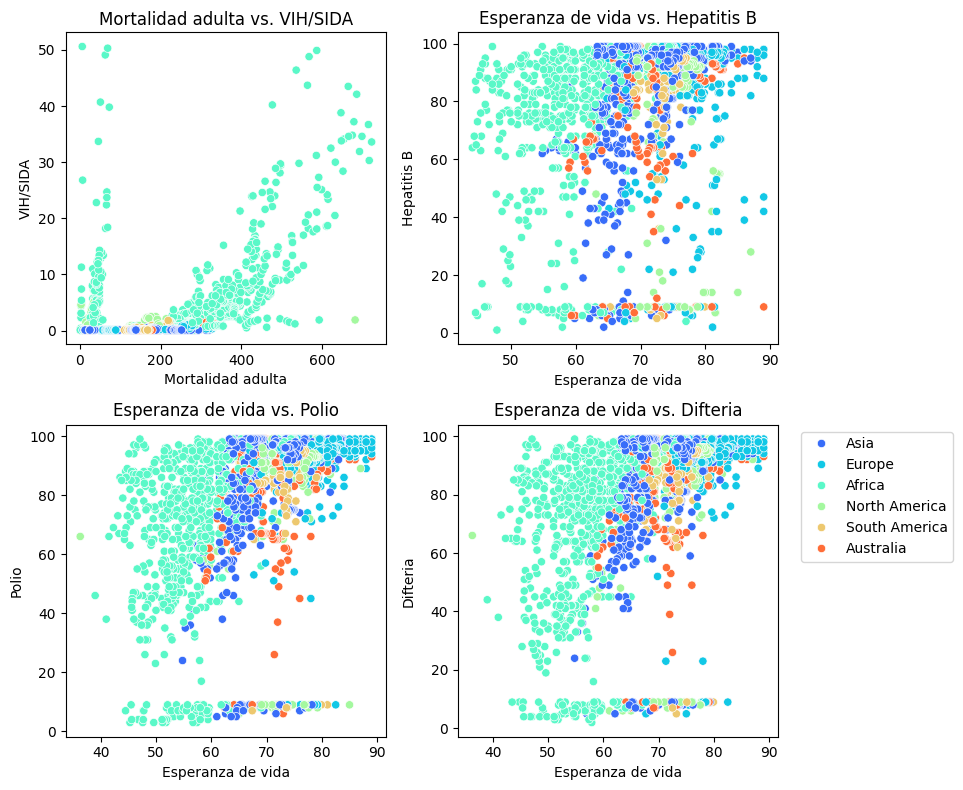

In [50]:
color = 'c'

# Crear una figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Gráfico 1: Mortalidad adulta vs. VIH/SIDA
sns.scatterplot(
    data=data,
    x='Mortalidad adulta',
    y='VIH/SIDA',
    hue='Continente',
    palette='rainbow',
    legend=None,
    color=color,
    ax=axs[0, 0]
)
axs[0, 0].set_title('Mortalidad adulta vs. VIH/SIDA')

# Gráfico 2: Esperanza de vida vs. Difteria
sns.scatterplot(
    data=data,
    x='Esperanza de vida',
    y='Hepatitis B',
    hue='Continente',
    palette='rainbow',
    color=color,
    legend=None,
    ax=axs[0, 1]
)
axs[0, 1].set_title('Esperanza de vida vs. Hepatitis B')

# Gráfico 3: Esperanza de vida vs. Polio
sns.scatterplot(
    data=data,
    x='Esperanza de vida',
    y='Polio',
    hue='Continente',
    palette='rainbow',
    color=color,
    legend=None,
    ax=axs[1, 0]
)
axs[1, 0].set_title('Esperanza de vida vs. Polio')

# Gráfico 4: Esperanza de vida vs. Difteria
sns.scatterplot(
    data=data,
    x='Esperanza de vida',
    y='Difteria',
    hue='Continente',
    palette='rainbow',
    color=color,
    ax=axs[1, 1]
)
axs[1, 1].set_title('Esperanza de vida vs. Difteria')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Ubicar la leyenda fuera del área de los gráficos
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar los gráficos
plt.show()


**Mortalidad adulta vs. VIH/SIDA:**

Hay una correlación positiva moderada **(0.550)** entre la mortalidad adulta y el VIH/SIDA. Esto indica que los países con una mayor tasa de incidencia de VIH/SIDA tienden a tener también una mayor mortalidad adulta.

**Esperanza de vida vs. Hepatitis B:**

Se observa una correlación positiva débil de **(0.199)** entre la incidencia de hepatitis B y la esperanza de vida. Esto sugiere que la presencia de casos de hepatitis B puede tener un impacto modesto en la esperanza de vida de una población.

**Esperanza de vida vs. Polio / Difteria:**

Ambas correlaciones con la esperanza de vida **(0.327)** para Polio y **(0.341)** para Difteria) son positivas pero relativamente bajas. Esto sugiere que la incidencia de estas enfermedades puede estar relacionada con la esperanza de vida, pero otros factores también pueden influir significativamente.




/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


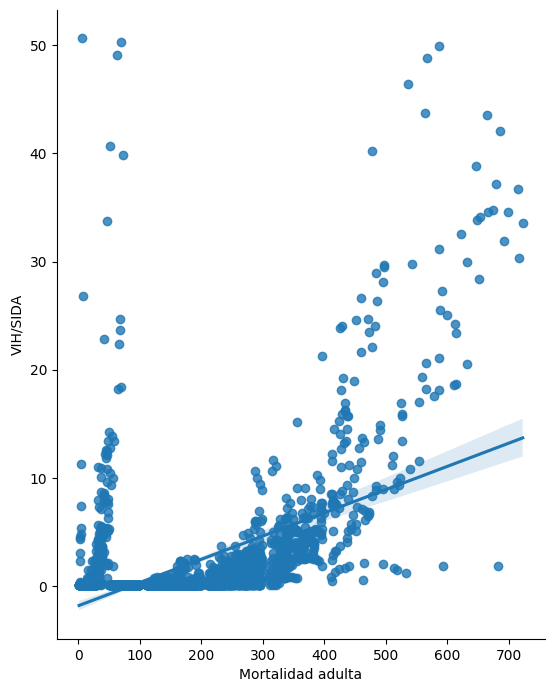

In [51]:
sns.pairplot(data, x_vars=['Mortalidad adulta'], y_vars=['VIH/SIDA'], size=7, aspect=0.8, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


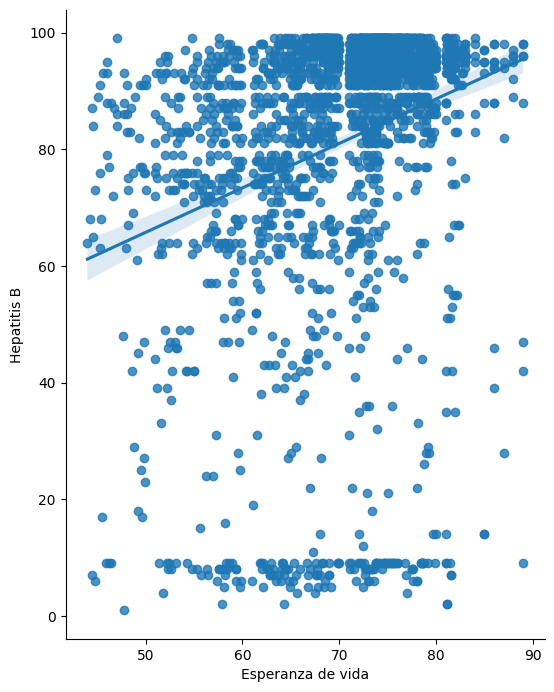

In [52]:
sns.pairplot(data, x_vars=['Esperanza de vida'], y_vars=['Hepatitis B'], size=7, aspect=0.8, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


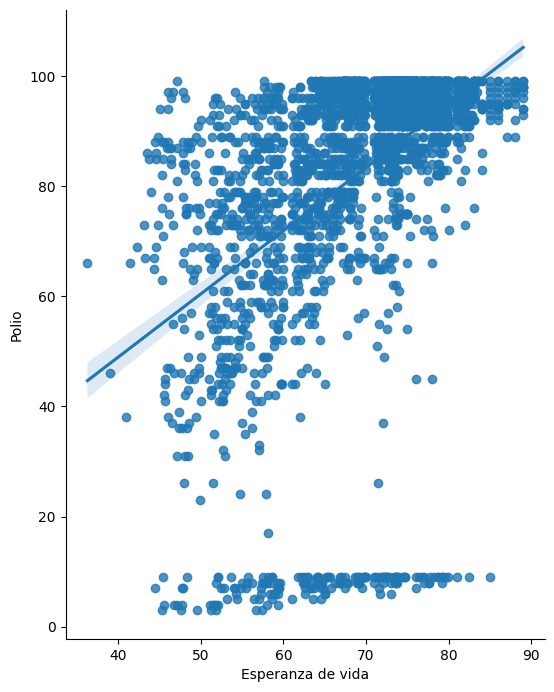

In [53]:
sns.pairplot(data, x_vars=['Esperanza de vida'], y_vars=['Polio'], size=7, aspect=0.8, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


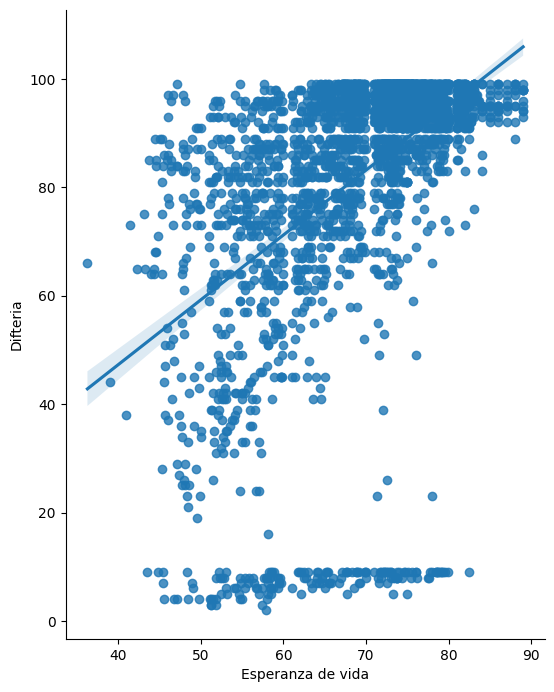

In [54]:
sns.pairplot(data, x_vars=['Esperanza de vida'], y_vars=['Difteria'], size=7, aspect=0.8, kind='reg')